In [1]:
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## z検定
---
標本分布が二項分布の場合、**期待値 $np$ (および分散 $np(1-p)$) が大きいとき**には[正規分布 $\mathcal{N}(np,np(1-p))$ で近似できる](../beginner/distribution.ipynb#%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83%E3%81%BE%E3%81%A8%E3%82%81)ことを利用して検定する。  
検定統計量

$$
\begin{align}
    z & =\frac
        {n\overline{X} -np}
        {\sqrt{
            np( 1-p)
        }}\\
     & \\
     & =\frac
         {\overline{X} -p}
         {\sqrt{
             {\displaystyle \frac
                 {p( 1-p)}
                 {n}
             }
         }}
\end{align}
$$

は標準正規分布 $\mathcal{N}(0,1)$ に従う。

###### 練習問題

コイントスを 30 回行い、 20 回表が出たとする。コインに偏りがある $\displaystyle \left( p\neq \frac{1}{2}\right)$ かどうかを検定するための統計量 $z$ を求める。

In [2]:
np.random.seed(1234)
x = [0] * 10 + [1] * 20
np.random.shuffle(x)
coin = pd.DataFrame(dict(X=x))
print('coin')
display(coin)

coin


,X
0,0
1,1
...,...
28,1
29,1


In [3]:
p = 0.5
z = (coin['X'].mean() - p) / np.sqrt(p * (1 - p) / coin.index.size)
z

1.8257418583505534

###### 練習問題

この検定に対応する帰無分布 (検定統計量 $z$ が従う分布) の確率密度関数と、上で求めた $z$ 統計量の位置をグラフ表示する。

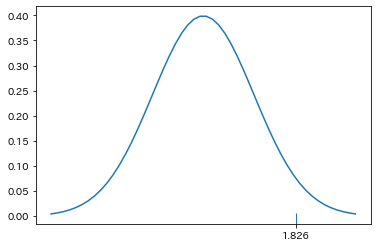

In [4]:
x = np.linspace(-3, 3, 50)
null_dist = stats.norm()
plt.plot(x, null_dist.pdf(x))
sns.rugplot([z])
plt.xticks([z])
plt.show()

###### 練習問題

上で求めた検定統計量 $z$ に対応した $p$ 値を求める。

In [5]:
p_value = null_dist.sf(np.abs(z)) * 2
p_value

0.06788915486182906

## Pythonでのz検定実行方法
---
`statsmodels.stats.proportion.proportions_ztest`を使用する。`prop_var` (分散を算出する基礎となる割合) には帰無仮説で設定した値を与える。

In [6]:
proportions_ztest??

In [7]:
proportions_ztest(coin['X'].sum(), coin.index.size, p, prop_var=p)

(1.8257418583505534, 0.06788915486182906)